In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [153]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

In [154]:
from sklearn.preprocessing import LabelEncoder

In [155]:
df = pd.read_csv('../Data/fish.csv')
df

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [156]:
df.Species.value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [157]:
x = df.loc[:, 'Weight':]
x

,Weight,Length,Diagonal,Height,Width
0,242.0,25.4,30.0,11.5200,4.0200
1,290.0,26.3,31.2,12.4800,4.3056
2,340.0,26.5,31.1,12.3778,4.6961
3,363.0,29.0,33.5,12.7300,4.4555
4,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...
154,12.2,12.2,13.4,2.0904,1.3936
155,13.4,12.4,13.5,2.4300,1.2690
156,12.2,13.0,13.8,2.2770,1.2558
157,19.7,14.3,15.2,2.8728,2.0672


In [158]:
x.shape

(159, 5)

In [159]:
y = df['Species']

In [160]:
e = LabelEncoder()               
y_en = e.fit_transform(y)
y_en

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5])

In [161]:
y_oh = tf.keras.utils.to_categorical(y_en)
y_oh

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [162]:
y_oh.shape

(159, 7)

In [163]:
model = Sequential()
model.add(Dense(20, input_dim = 5, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(7, activation = 'softmax'))
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 20)                120       
                                                                 
 dense_57 (Dense)            (None, 16)                336       
                                                                 
 dense_58 (Dense)            (None, 8)                 136       
                                                                 
 dense_59 (Dense)            (None, 7)                 63        
                                                                 
Total params: 655
Trainable params: 655
Non-trainable params: 0
_________________________________________________________________


In [164]:
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

In [165]:
model.fit(x, y_oh, epochs = 100, batch_size = 2)

Epoch 1/100
80/80 [==============================] - 0s 709us/step - loss: 12.0977 - accuracy: 0.2013
Epoch 2/100
80/80 [==============================] - 0s 679us/step - loss: 1.9382 - accuracy: 0.3082
Epoch 3/100
80/80 [==============================] - 0s 687us/step - loss: 1.7624 - accuracy: 0.3522
Epoch 4/100
80/80 [==============================] - 0s 713us/step - loss: 1.6722 - accuracy: 0.3522
Epoch 5/100
80/80 [==============================] - 0s 689us/step - loss: 1.6420 - accuracy: 0.3522
Epoch 6/100
80/80 [==============================] - 0s 731us/step - loss: 1.5957 - accuracy: 0.3899
Epoch 7/100
80/80 [==============================] - 0s 729us/step - loss: 1.5587 - accuracy: 0.4277
Epoch 8/100
80/80 [==============================] - 0s 717us/step - loss: 1.4810 - accuracy: 0.5094
Epoch 9/100
80/80 [==============================] - 0s 719us/step - loss: 1.4698 - accuracy: 0.4843
Epoch 10/100
80/80 [==============================] - 0s 722us/step - loss: 1.4300 - accur

80/80 [==============================] - 0s 658us/step - loss: 1.1014 - accuracy: 0.5409
Epoch 82/100
80/80 [==============================] - 0s 655us/step - loss: 1.1182 - accuracy: 0.5346
Epoch 83/100
80/80 [==============================] - 0s 643us/step - loss: 1.0697 - accuracy: 0.5472
Epoch 84/100
80/80 [==============================] - 0s 678us/step - loss: 1.0710 - accuracy: 0.5660
Epoch 85/100
80/80 [==============================] - 0s 680us/step - loss: 1.0502 - accuracy: 0.5535
Epoch 86/100
80/80 [==============================] - 0s 641us/step - loss: 1.0326 - accuracy: 0.5723
Epoch 87/100
80/80 [==============================] - 0s 640us/step - loss: 1.0392 - accuracy: 0.5597
Epoch 88/100
80/80 [==============================] - 0s 664us/step - loss: 0.9963 - accuracy: 0.5912
Epoch 89/100
80/80 [==============================] - 0s 652us/step - loss: 1.0573 - accuracy: 0.5597
Epoch 90/100
80/80 [==============================] - 0s 648us/step - loss: 1.0671 - accuracy: 

In [166]:
model.evaluate(x, y_oh)

5/5 [==============================] - 0s 998us/step - loss: 0.6227 - accuracy: 0.7736


[0.6227254271507263, 0.7735849022865295]

In [167]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y_oh, random_state=111)

In [168]:
model = Sequential()
model.add(Dense(20, input_dim = 5, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(7, activation = 'softmax'))
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 20)                120       
                                                                 
 dense_61 (Dense)            (None, 16)                336       
                                                                 
 dense_62 (Dense)            (None, 8)                 136       
                                                                 
 dense_63 (Dense)            (None, 7)                 63        
                                                                 
Total params: 655
Trainable params: 655
Non-trainable params: 0
_________________________________________________________________


In [169]:
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

In [170]:
model.fit(x_train, y_train, epochs = 100, batch_size = 2)

Epoch 1/100
60/60 [==============================] - 0s 730us/step - loss: 26.8427 - accuracy: 0.0672
Epoch 2/100
60/60 [==============================] - 0s 707us/step - loss: 3.0386 - accuracy: 0.3277
Epoch 3/100
60/60 [==============================] - 0s 746us/step - loss: 2.3666 - accuracy: 0.3277
Epoch 4/100
60/60 [==============================] - 0s 674us/step - loss: 2.0566 - accuracy: 0.3950
Epoch 5/100
60/60 [==============================] - 0s 711us/step - loss: 1.9464 - accuracy: 0.4706
Epoch 6/100
60/60 [==============================] - 0s 680us/step - loss: 1.6278 - accuracy: 0.4790
Epoch 7/100
60/60 [==============================] - 0s 697us/step - loss: 1.8280 - accuracy: 0.4622
Epoch 8/100
60/60 [==============================] - 0s 723us/step - loss: 1.6066 - accuracy: 0.4790
Epoch 9/100
60/60 [==============================] - 0s 662us/step - loss: 1.4554 - accuracy: 0.4874
Epoch 10/100
60/60 [==============================] - 0s 718us/step - loss: 1.8275 - accur

60/60 [==============================] - 0s 644us/step - loss: 0.8317 - accuracy: 0.6807
Epoch 82/100
60/60 [==============================] - 0s 691us/step - loss: 0.7803 - accuracy: 0.7143
Epoch 83/100
60/60 [==============================] - 0s 676us/step - loss: 0.9726 - accuracy: 0.6555
Epoch 84/100
60/60 [==============================] - 0s 658us/step - loss: 0.8422 - accuracy: 0.7227
Epoch 85/100
60/60 [==============================] - 0s 658us/step - loss: 0.7934 - accuracy: 0.6555
Epoch 86/100
60/60 [==============================] - 0s 658us/step - loss: 0.9965 - accuracy: 0.6387
Epoch 87/100
60/60 [==============================] - 0s 663us/step - loss: 0.7481 - accuracy: 0.7143
Epoch 88/100
60/60 [==============================] - 0s 668us/step - loss: 0.8249 - accuracy: 0.6639
Epoch 89/100
60/60 [==============================] - 0s 707us/step - loss: 0.9984 - accuracy: 0.6639
Epoch 90/100
60/60 [==============================] - 0s 655us/step - loss: 0.8297 - accuracy: 

In [171]:
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 1ms/step - loss: 0.7668 - accuracy: 0.7750


[0.7667639255523682, 0.7749999761581421]

In [172]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.fit_transform(x_test)

In [179]:
model = Sequential()
model.add(Dense(128, input_dim = 5, activation = 'relu'))
model.add(Dense(68, activation = 'relu'))
model.add(Dense(36, activation = 'relu'))
model.add(Dense(7, activation = 'softmax'))
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_68 (Dense)            (None, 128)               768       
                                                                 
 dense_69 (Dense)            (None, 68)                8772      
                                                                 
 dense_70 (Dense)            (None, 36)                2484      
                                                                 
 dense_71 (Dense)            (None, 7)                 259       
                                                                 
Total params: 12,283
Trainable params: 12,283
Non-trainable params: 0
_________________________________________________________________


In [180]:
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

In [181]:
hist = model.fit(x_train_sc, y_train, epochs = 100, batch_size = 2, validation_split=0.2)

Epoch 1/100
48/48 [==============================] - 0s 3ms/step - loss: 1.8354 - accuracy: 0.2421 - val_loss: 1.5913 - val_accuracy: 0.7083
Epoch 2/100
48/48 [==============================] - 0s 1ms/step - loss: 1.6526 - accuracy: 0.3684 - val_loss: 1.4397 - val_accuracy: 0.7083
Epoch 3/100
48/48 [==============================] - 0s 1ms/step - loss: 1.5103 - accuracy: 0.5158 - val_loss: 1.3072 - val_accuracy: 0.7083
Epoch 4/100
48/48 [==============================] - 0s 1ms/step - loss: 1.3605 - accuracy: 0.6000 - val_loss: 1.1245 - val_accuracy: 0.7083
Epoch 5/100
48/48 [==============================] - 0s 1ms/step - loss: 1.1953 - accuracy: 0.6842 - val_loss: 0.9951 - val_accuracy: 0.7083
Epoch 6/100
48/48 [==============================] - 0s 1ms/step - loss: 1.0413 - accuracy: 0.6947 - val_loss: 0.8672 - val_accuracy: 0.7083
Epoch 7/100
48/48 [==============================] - 0s 1ms/step - loss: 0.8947 - accuracy: 0.7263 - val_loss: 0.7267 - val_accuracy: 0.7500
Epoch 8/100
4

Epoch 59/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2645 - accuracy: 0.8842 - val_loss: 0.3144 - val_accuracy: 0.9167
Epoch 60/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2632 - accuracy: 0.8737 - val_loss: 0.3467 - val_accuracy: 0.8333
Epoch 61/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2835 - accuracy: 0.8737 - val_loss: 0.3268 - val_accuracy: 0.9167
Epoch 62/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2938 - accuracy: 0.8526 - val_loss: 0.3496 - val_accuracy: 0.8750
Epoch 63/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2991 - accuracy: 0.8316 - val_loss: 0.3769 - val_accuracy: 0.8750
Epoch 64/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2703 - accuracy: 0.8842 - val_loss: 0.3700 - val_accuracy: 0.7917
Epoch 65/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2827 - accuracy: 0.8842 - val_loss: 0.4155 - val_accuracy: 0.8333
Epoch 

In [182]:
model.evaluate(x_test_sc, y_test)

2/2 [==============================] - 0s 2ms/step - loss: 3.4654 - accuracy: 0.2750


[3.465449094772339, 0.2750000059604645]

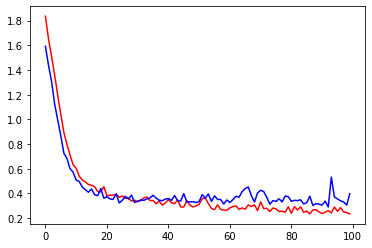

In [183]:
plt.plot(hist.history['loss'], c = 'r')
plt.plot(hist.history['val_loss'], c = 'b')